1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, optimize
from math import pi
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
h = 15 #hurricanes per year
mu = 6.3
sigma_mu = np.sqrt(mu)

prob = 1. - stats.poisson.cdf(h,mu) #15 or more hurricanes 
print("Probability of having 15 or more hurricanes in a year =",prob)

Z = abs(h - mu) / sigma_mu
print("Z =", Z)

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)



Probability of having 15 or more hurricanes in a year = 0.0008444930803583883
Z = 3.4661629670697414
p-value = 0.0005279431738299246


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

pre_std = np.sqrt(np.var(pre, ddof=1))
pre_mean = np.mean(pre)
post_std = np.sqrt(np.var(post, ddof=1))
post_mean = np.mean(post)
sigma = np.sqrt((pre_std**2 + post_std**2)/2)
n = len(pre)

T = (pre_mean - post_mean) / (sigma / np.sqrt(n/2))
print("T =", T)

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("The change in blood pressures within our samples is not statistically significant.")

T = -3.786997938137629
p-value = 0.004302464132864604
The change in blood pressures within our samples is not statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

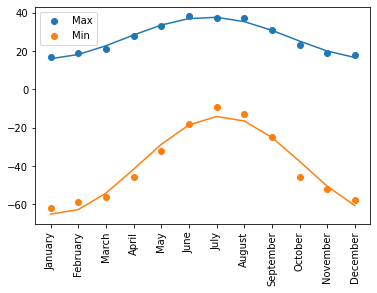

The two offset are (in months): 9.276519948785255 and 8.843963512501217
The fit is reasonable, although also a sine function without offsets would have been acceptable


In [5]:
import calendar

months = calendar.month_name[1:]
max_T = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_T = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

plt.scatter(months, max_T, label='Max')
plt.scatter(months, min_T, label='Min')
plt.xticks(rotation=90)

def f(x, amp, c, offset):
    return offset + amp * np.sin(2*np.pi * x /12 + c)

x = np.linspace(0,11,12)
popt, pcov = optimize.curve_fit(f, x, np.array(max_T), p0=[10, -2, 30])
popt1, pcov1 = optimize.curve_fit(f, x, np.array(min_T), p0=[25, -2, -30]) #non variano.. perchè?

plt.plot(x, f(x, popt[0], popt[1], popt[2]))
plt.plot(x, f(x, popt1[0], popt1[1], popt1[2]))
plt.legend()

plt.show()

#time offset in months
time1 = 12+popt[1]/(2*np.pi/12)
time2 = 12+popt1[1]/(2*np.pi/12)
print("The two offset are (in months):", time1, "and", time2)

print("The fit is reasonable, although also a sine function without offsets would have been acceptable") 

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

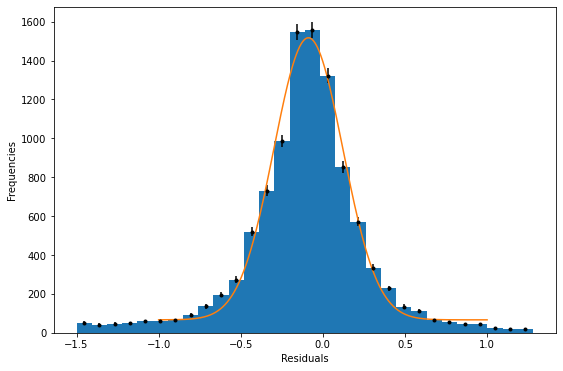

Chi2 =  555.3516111821157
p-value = 0.0

The goodness of fit test does not result in a satisfactory p-value, meaning that the gaussian function is probably inadequate for fitting the data.


In [28]:
datafile = np.load("data/residuals_261.pkl", allow_pickle = True) #sistemo perchè così è troppo strano
data = datafile.tolist()
df = pd.DataFrame(data)

plt.figure(figsize=(9, 6))

x = df["residuals"]
x = x[x< 1.3]
x = x[x>-1.5]
b = 30
bin_counts, bin_edges, patches = plt.hist(x,bins=b)
plt.ylabel("Frequencies")
plt.xlabel("Residuals")
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
y_error = (np.sqrt(bin_counts))
plt.errorbar(x=bin_centres, y=bin_counts,
             yerr=y_error, fmt='.k')

def f(x,A,mu,sigma,c):
    return c + A*np.exp(-pow((x-mu)/(sigma),2)/2)
    
x_plot = np.linspace(int(min(x)),int(max(x)),1000)

popt, pcov = optimize.curve_fit(f, bin_centres, bin_counts, full_output=False)
plt.plot(x_plot,f(x_plot,popt[0],popt[1],popt[2],popt[3]),label="Fitting curve")
plt.show()

chi2 = np.sum(pow((bin_counts - f(bin_centres,popt[0],popt[1],popt[2],popt[3]))/y_error,2))
ndof = b - 1
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("Chi2 = ", chi2)
print("p-value = {}".format(pvalue))
print("\nThe goodness of fit test does not result in a satisfactory p-value, meaning that the gaussian function is probably inadequate for fitting the data.")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [16]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

The best fit parameters are:
a = 9.99 +- 0.03
b = 2.9082 +- 0.0003
c\ = 9.38 +- 0.02
Average temperature in Munich c =  9.384114868408009 °C
Avarage daily temperature for the hottest time of the year is (c+a) =  19.372248542506654 °C
Avarage daily temperature for the coldest time of the year is (c-a) = 0.6040188056906342 °C


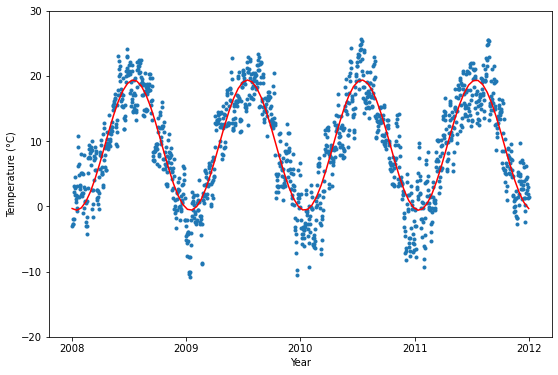

In [24]:
def f(t, a, b, c):
    return a * np.cos(2*np.pi*t + b) + c

df = pd.DataFrame(pd.read_csv("data/munich_temperatures_average_with_bad_data.txt", header=None,  delimiter=" ", names = ["time","temperature"]))

gridsize = (1, 1)
fig = plt.figure(figsize = (9,6))
hs = plt.subplot2grid(gridsize, (0, 0))
hs.xaxis.set_major_locator(plt.MultipleLocator(1))

years = np.array([val for val in df["time"] if val <= 2012 and val > 2008])
dfy = df[df["time"] >= 2008]
temp = np.array(dfy["temperature"][dfy["time"] <= 2012])

x_plot = np.linspace(2008,2012,100)
popt, pcov = optimize.curve_fit(f, years, temp, p0 = [10, 3, 10], full_output=False)

plt.plot(years, temp, marker='.', ls = "")
plt.plot(x_plot,f(x_plot,popt[0],popt[1],popt[2]),label="Fitting curve f(x)",color = "r")
plt.ylim((-20,30))
plt.ylabel("Temperature (°C)")
plt.xlabel("Year")

print("The best fit parameters are:\na = %.2f +- %.2f\nb = %.4f +- %.4f\nc\ = %.2f +- %.2f" % (popt[0], pcov[0,0], popt[1], pcov[1,1], popt[2], pcov[2,2]))
print("Average temperature in Munich c = ", popt[2], "°C" )
print("Avarage daily temperature for the hottest time of the year is (c+a) = ",(popt[0] + popt[2]),"°C" )
print("Avarage daily temperature for the coldest time of the year is (c-a) =",  (popt[0] - popt[2]), "°C")

#The b parameter is the phase of the cosine function 
#its meaning is to 'align' the maxima and minima of the function with respectively the hottest and coldest period of the year


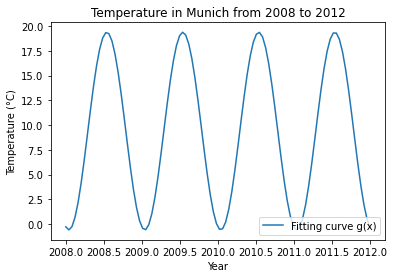


The RSS for f(x) is: 34359.85859996656
The RSS for g(x) is: 34352.79405370933

Comparison between the two functions:
CL: 0.584 , additional parameter necessary: NO


In [27]:
def g(t,a,b,c,d):
    return a*np.cos(2*np.pi*b*t + c) + d

popt1, pcov1 = optimize.curve_fit(g, years, temp, full_output=False)
plt.plot(x_plot,g(x_plot,popt1[0],popt1[1],popt1[2], popt1[3]),label="Fitting curve g(x)")
plt.legend(loc = "lower right")
plt.title("Temperature in Munich from 2008 to 2012")
plt.ylabel("Temperature (°C)")
plt.xlabel("Year")
plt.show()

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

RSSf = 0
RSSg = 0
for i in range(len(years)):
    RSSf += pow((temp[i] - f(years[i],popt[0],popt[1],popt[2])),2)
    RSSg += pow((temp[i] - g(years[i],popt1[0],popt1[1],popt1[2],popt1[3])),2)
    
print("\nThe RSS for f(x) is:", RSSf)
print("The RSS for g(x) is:" , RSSg)

ndoff = 3 - 1
ndofg = 4 - 1

print("\nComparison between the two functions:")
comp = Ftest(RSSf, RSSg, ndoff, ndofg, len(years), verbose=True)
